# Africa

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
from geopandas.datasets import naturalearth_cities, naturalearth_lowres


%matplotlib inline

In [38]:
guardian = gpd.read_file('../language_data/guardian_version2/')

In [39]:
endangered_africa = guardian[guardian['continent'] == 'Africa']

In [40]:
wals = pd.read_csv('../language_data/wals_full_language.csv')

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [42]:
africa = world[world['continent']=='Africa']

In [43]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [44]:
guardian.head()

,ID,Name in En,Countries,Country co,ISO639-3 c,Degree of,Alternate,Number of,Sources,Latitude,Longitude,Descriptio,Country,continent,geometry
0,1022,South Italian,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; ????????????...,7500000,None,40.9798,15.249,"Campania, Lucania (Basilicata), Abruzzi (Abruz...",Italy,Europe,POINT (15.249 40.9798)
1,1023,Sicilian,Italy,ITA,scn,Vulnerable,None,5000000,None,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri...",Italy,Europe,POINT (14.5019 37.4399)
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",4800000,None,53.4029,10.3601,"northern Germany, the north-eastern part of th...",Germany,Europe,POINT (10.3601 53.4029)
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,None,4000000,Hienad? Cychun: Weißrussisch. ? Lexikon der Sp...,53.956,27.5756,Belarus except the Polesian-speaking south-wes...,Belarus,Europe,POINT (27.5756 53.956)
4,382,Lombard,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,None,3500000,None,45.7215,9.327299999999999,the region of Lombardy (except the southernmos...,Italy,Europe,POINT (9.327299999999999 45.7215)


In [45]:
guardian['Number of'].fillna(0, inplace=True)

In [46]:
guardian['Number of'] = guardian['Number of'].map(lambda x: float(x))

In [47]:
endangered_africa['Number of'].fillna(0, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
endangered_africa['Number of'] = guardian['Number of'].map(lambda x: float(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
africa['endangered'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
endangered_africa.rename(columns={'Country':'country'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [51]:
counts = pd.DataFrame(endangered_africa['country'].value_counts())

In [52]:
counts.rename(columns={'country':'count'}, inplace=True)

In [53]:
counts['country'] = endangered_africa['country'].value_counts().index

In [54]:
africa.rename(columns={'name':'country'}, inplace=True)

In [55]:
africa = africa.merge(counts, how='outer', on='country')

In [56]:
africa['count'].fillna(0, inplace=True)

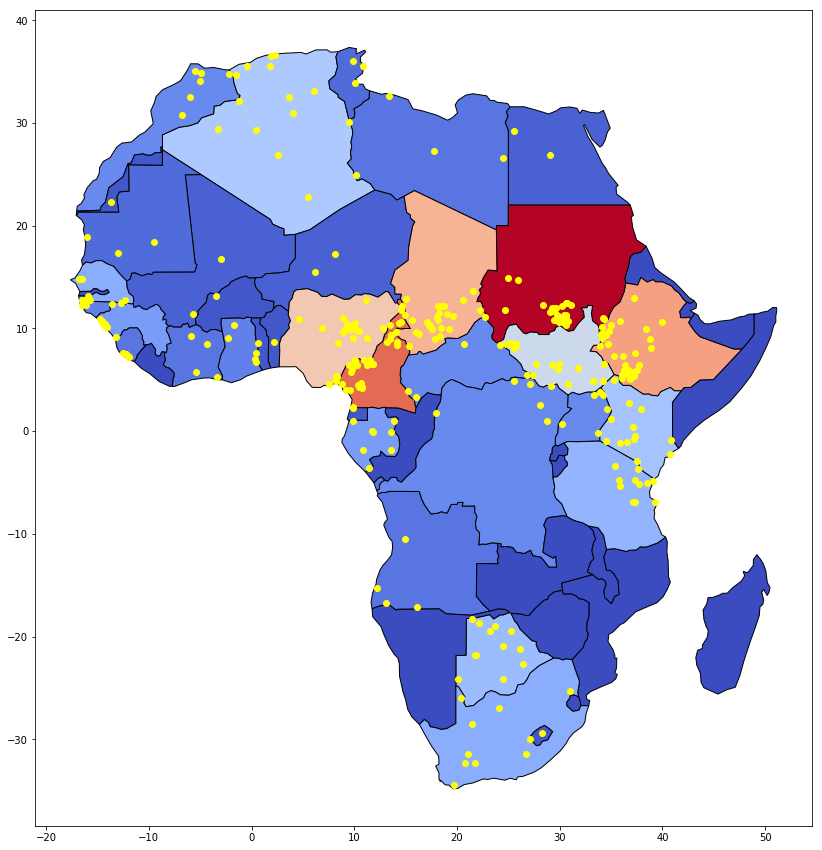

In [57]:
africa_base = africa.plot(column='count', cmap='coolwarm', edgecolor='black', figsize=(20,15))
endangered_africa.plot(ax=africa_base, color='yellow');

In [58]:
demographics = pd.read_csv('../demographic_data/census_data_20190508_5cd2d6bce1955.csv')

In [59]:
demographics2 = pd.read_csv('../demographic_data/census_data_africa8897.csv')

In [60]:
demographics3 = pd.read_csv('../demographic_data/census_data_africa0809.csv')

In [61]:
demographics4 = pd.read_csv('../demographic_data/census_data_africa9807.csv')

In [62]:
demographics = pd.concat([demographics, demographics2, demographics3, demographics4],ignore_index=True)

In [63]:
demographics[demographics['Region'] == 'Custom Region'].index

Int64Index([1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1252,
            1253, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823],
           dtype='int64')

In [64]:
demographics.drop(index=demographics[demographics['Region'] == 'Custom Region'].index, inplace=True)

In [65]:
demographics.dtypes

Region                                         object
Country                                        object
Year                                            int64
Births per 1,000 population                    object
Deaths per 1,000 population                    object
Net Number of Migrants per 1,000 population    object
Rate of natural increase (percent)             object
Growth rate (percent)                          object
Population                                      int64
Births                                         object
Deaths                                         object
Net Number of Migrants                         object
Natural Increase                               object
Population Change                              object
dtype: object

In [66]:
demographics.rename(columns={'Country':'country'}, inplace=True)

In [67]:
africa_to_demographics = {'Burkina Faso' : 'BurkinaFaso',
 'Central African Rep.' : 'CentralAfricanRepublic', 
 "Côte d'Ivoire" : "Coted'Ivoire",
 'Dem. Rep. Congo' : 'Congo(Kinshasa)',
 'Congo' : 'Congo(Brazzaville)',
 'Gambia' : 'Gambia,The',
 'Eq. Guinea' : 'EquatorialGuinea',
 'W. Sahara' : 'WesternSahara',
 'S. Sudan' : 'SouthSudan',
 'Sierra Leone' : 'SierraLeone',
 'Somaliland' : 'Somalia',
 'Swaziland' : 'Eswatini',
 'South Africa' : 'SouthAfrica'}

In [68]:
country_list = [i for i in africa_to_demographics.keys()]

In [69]:
country_list

['Burkina Faso',
 'Central African Rep.',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Congo',
 'Gambia',
 'Eq. Guinea',
 'W. Sahara',
 'S. Sudan',
 'Sierra Leone',
 'Somaliland',
 'Swaziland',
 'South Africa']

In [70]:
africa.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,endangered,count
0,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0,4.0
1,8988091.0,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...,0,0.0
2,8791832.0,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,...",0,1.0
3,15746232.0,Africa,Burkina Faso,BFA,17820.0,POLYGON ((-2.827496303712707 9.642460842319778...,0,1.0
4,1990876.0,Africa,Botswana,BWA,27060.0,POLYGON ((25.64916344575016 -18.53602589281899...,0,12.0


In [71]:
africa['country'].iloc[[3,5,6,8,9,18,20,35,37,39,40,42,48 ]] = africa[africa['country'].isin(country_list)]['country'].map(africa_to_demographics)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
africa[africa['country'].isin(country_list)]

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,endangered,count


In [73]:
df = demographics.merge(africa, how='outer')

In [74]:
df = df.drop(columns=['endangered','pop_est','gdp_md_est','continent'])

In [75]:
df.head()

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,count
0,Africa,Algeria,2010,24.7,4.3,-0.9,2.04,1.95,35949869,887962,154584,-33074,733377,700303,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
1,Africa,Algeria,2011,24.6,4.3,-1,2.03,1.93,36654293,901329,157980,-34822,743349,708527,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
2,Africa,Algeria,2012,24.4,4.3,-0.9,2.01,1.92,37367226,913255,161053,-35125,752202,717077,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
3,Africa,Algeria,2013,24.3,4.3,-0.9,1.99,1.9,38087812,923629,164158,-35422,759471,724049,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
4,Africa,Algeria,2014,24,4.3,-0.9,1.97,1.88,38813722,931141,167287,-36097,763854,727757,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0


In [76]:
df.isnull().sum()

Region                                           0
country                                          0
Year                                             0
Births per 1,000 population                      0
Deaths per 1,000 population                      0
Net Number of Migrants per 1,000 population      0
Rate of natural increase (percent)               0
Growth rate (percent)                            0
Population                                       0
Births                                           0
Deaths                                           0
Net Number of Migrants                           0
Natural Increase                                 0
Population Change                                0
iso_a3                                         192
geometry                                       192
count                                          192
dtype: int64

In [77]:
[i for i in df.columns]

['Region',
 'country',
 'Year',
 'Births per 1,000 population',
 'Deaths per 1,000 population',
 'Net Number of Migrants per 1,000 population',
 'Rate of natural increase (percent)',
 'Growth rate (percent)',
 'Population',
 'Births',
 'Deaths',
 'Net Number of Migrants',
 'Natural Increase',
 'Population Change',
 'iso_a3',
 'geometry',
 'count']

In [78]:
numeric_columns = ['Year',
 'Births per 1,000 population',
 'Deaths per 1,000 population',
 'Net Number of Migrants per 1,000 population',
 'Rate of natural increase (percent)',
 'Growth rate (percent)',
 'Population',
 'Births',
 'Deaths',
 'Net Number of Migrants',
 'Natural Increase',
 'Population Change',
 'count']

In [79]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


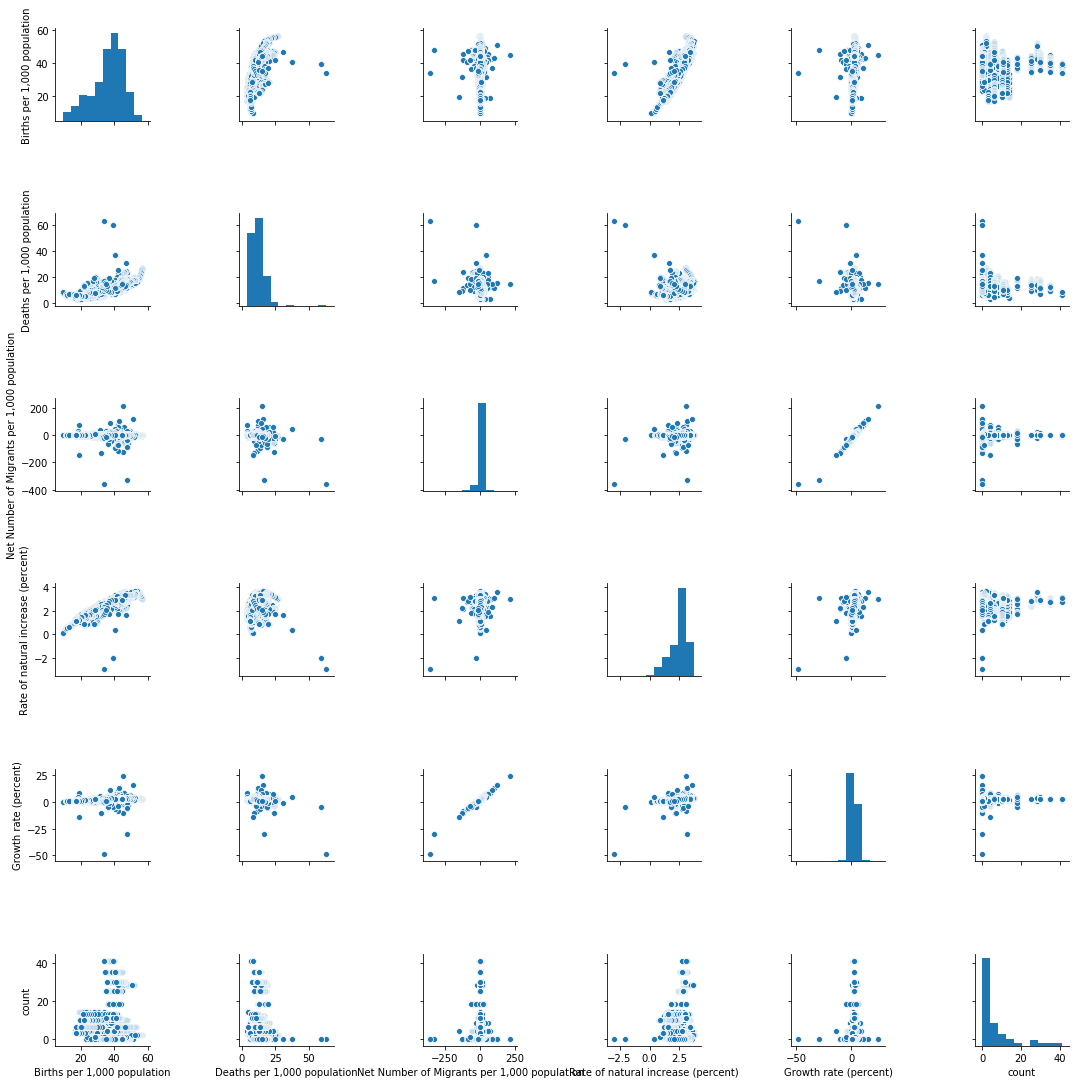

In [80]:
sns.pairplot(df[['Births per 1,000 population',
                 'Deaths per 1,000 population',
                 'Net Number of Migrants per 1,000 population',
                 'Rate of natural increase (percent)',
                 'Growth rate (percent)',
                 'count']]);

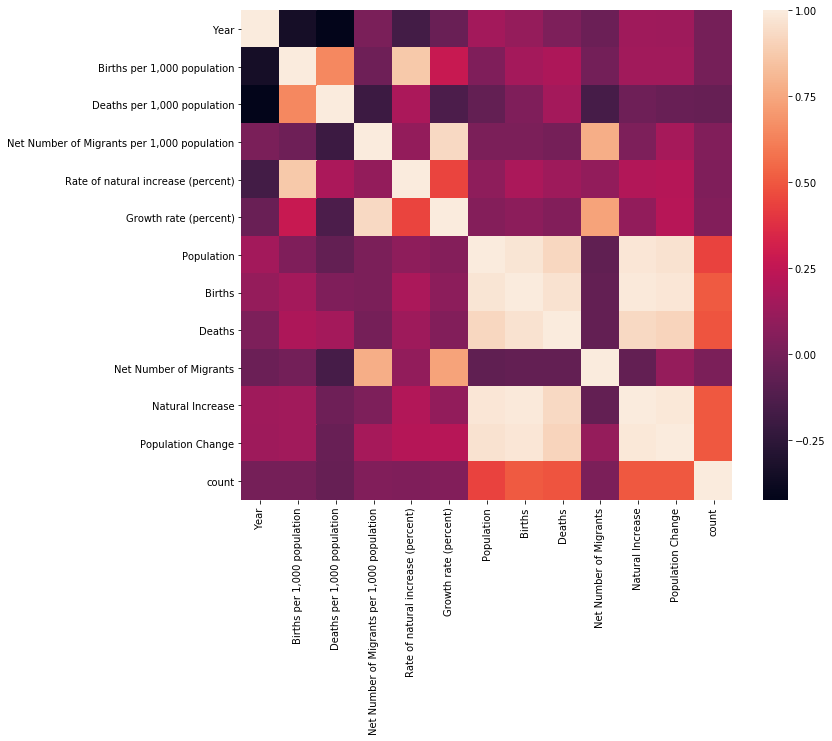

In [81]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr())

In [82]:
df.rename(columns={'count':'endangered'},inplace=True)

In [83]:
df

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered
0,Africa,Algeria,2010,24.7,4.3,-0.9,2.04,1.95,35949869,887962.0,154584.0,-33074.0,733377.0,700303.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
1,Africa,Algeria,2011,24.6,4.3,-1.0,2.03,1.93,36654293,901329.0,157980.0,-34822.0,743349.0,708527.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
2,Africa,Algeria,2012,24.4,4.3,-0.9,2.01,1.92,37367226,913255.0,161053.0,-35125.0,752202.0,717077.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
3,Africa,Algeria,2013,24.3,4.3,-0.9,1.99,1.90,38087812,923629.0,164158.0,-35422.0,759471.0,724049.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
4,Africa,Algeria,2014,24.0,4.3,-0.9,1.97,1.88,38813722,931141.0,167287.0,-36097.0,763854.0,727757.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
5,Africa,Algeria,2015,23.7,4.3,-0.9,1.94,1.84,39542166,935963.0,170427.0,-36379.0,765536.0,729158.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
6,Africa,Algeria,2016,23.0,4.3,-0.9,1.86,1.77,40263711,924052.0,173537.0,-36237.0,750516.0,714278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
7,Africa,Algeria,2017,22.2,4.3,-0.9,1.79,1.70,40969443,910341.0,176578.0,-36463.0,733763.0,697300.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
8,Africa,Algeria,2018,21.5,4.3,-0.9,1.72,1.63,41657488,895219.0,179960.0,-36242.0,715259.0,679017.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
9,Africa,Algeria,2019,20.7,4.3,-0.9,1.64,1.56,42325923,877840.0,183271.0,-36400.0,694568.0,658168.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0


In [84]:
df['iso_a3'].value_counts()

KEN    42
LSO    32
GMB    32
BFA    32
MOZ    32
SLE    32
UGA    32
BWA    32
SDN    32
GNB    32
GIN    32
MDG    32
NER    32
NAM    32
ZAF    32
COG    32
SOM    32
GAB    32
CMR    32
ESH    32
TGO    32
LBR    32
GNQ    32
ETH    32
ZMB    32
DJI    32
CIV    32
MLI    32
CAF    32
AGO    32
TUN    32
ERI    32
BDI    32
EGY    32
LBY    32
COD    32
NGA    32
BEN    32
GHA    32
SEN    32
SSD    32
TCD    32
RWA    32
MAR    32
TZA    32
DZA    32
MWI    32
ZWE    32
SWZ    32
-99    32
MRT    32
Name: iso_a3, dtype: int64

In [85]:
df = df.drop(df[df['iso_a3'] == '-99'].index)

In [86]:
df.drop(index=[i for i in range(810,820)], inplace=True)

In [87]:
df.head(0)

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered


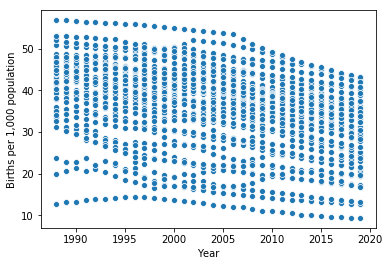

In [88]:
sns.scatterplot(df['Year'], df['Births per 1,000 population'])

In [89]:
wals_africa = wals[wals['macroarea'] == 'Africa']

In [90]:
df

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered
0,Africa,Algeria,2010,24.7,4.3,-0.9,2.04,1.95,35949869,887962.0,154584.0,-33074.0,733377.0,700303.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
1,Africa,Algeria,2011,24.6,4.3,-1.0,2.03,1.93,36654293,901329.0,157980.0,-34822.0,743349.0,708527.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
2,Africa,Algeria,2012,24.4,4.3,-0.9,2.01,1.92,37367226,913255.0,161053.0,-35125.0,752202.0,717077.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
3,Africa,Algeria,2013,24.3,4.3,-0.9,1.99,1.90,38087812,923629.0,164158.0,-35422.0,759471.0,724049.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
4,Africa,Algeria,2014,24.0,4.3,-0.9,1.97,1.88,38813722,931141.0,167287.0,-36097.0,763854.0,727757.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
5,Africa,Algeria,2015,23.7,4.3,-0.9,1.94,1.84,39542166,935963.0,170427.0,-36379.0,765536.0,729158.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
6,Africa,Algeria,2016,23.0,4.3,-0.9,1.86,1.77,40263711,924052.0,173537.0,-36237.0,750516.0,714278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
7,Africa,Algeria,2017,22.2,4.3,-0.9,1.79,1.70,40969443,910341.0,176578.0,-36463.0,733763.0,697300.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
8,Africa,Algeria,2018,21.5,4.3,-0.9,1.72,1.63,41657488,895219.0,179960.0,-36242.0,715259.0,679017.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0
9,Africa,Algeria,2019,20.7,4.3,-0.9,1.64,1.56,42325923,877840.0,183271.0,-36400.0,694568.0,658168.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0


In [91]:
[i for i in wals_africa.columns]

['wals_code',
 'iso_code',
 'glottocode',
 'Name',
 'latitude',
 'longitude',
 'genus',
 'family',
 'macroarea',
 'countrycodes',
 '1A Consonant Inventories',
 '2A Vowel Quality Inventories',
 '3A Consonant-Vowel Ratio',
 '4A Voicing in Plosives and Fricatives',
 '5A Voicing and Gaps in Plosive Systems',
 '6A Uvular Consonants',
 '7A Glottalized Consonants',
 '8A Lateral Consonants',
 '9A The Velar Nasal',
 '10A Vowel Nasalization',
 '11A Front Rounded Vowels',
 '12A Syllable Structure',
 '13A Tone',
 '14A Fixed Stress Locations',
 '15A Weight-Sensitive Stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems',
 '17A Rhythm Types',
 '18A Absence of Common Consonants',
 '19A Presence of Uncommon Consonants',
 '20A Fusion of Selected Inflectional Formatives',
 '21A Exponence of Selected Inflectional Formatives',
 '22A Inflectional Synthesis of the Verb',
 '23A Locus of Marking in the Clause',
 '24A Locus of Marking in Possessive Noun Phrases',
 '25A Locus of Marking: Whole-langua

In [92]:
import pycountry
import pycountry_convert as pc

In [93]:
for i in range(20):
    print(list(pycountry.countries)[i])

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')
Country(alpha_2='AS', alpha_3='ASM', name='American Samoa', n

In [94]:
pycountry.countries

In [241]:
list(pycountry.languages)

[Language(alpha_3='aaa', name='Ghotuo', scope='I', type='L'),
 Language(alpha_3='aab', name='Alumu-Tesu', scope='I', type='L'),
 Language(alpha_3='aac', name='Ari', scope='I', type='L'),
 Language(alpha_3='aad', name='Amal', scope='I', type='L'),
 Language(alpha_3='aae', inverted_name='Albanian, Arbëreshë', name='Arbëreshë Albanian', scope='I', type='L'),
 Language(alpha_3='aaf', name='Aranadan', scope='I', type='L'),
 Language(alpha_3='aag', name='Ambrak', scope='I', type='L'),
 Language(alpha_3='aah', inverted_name="Arapesh, Abu'", name="Abu' Arapesh", scope='I', type='L'),
 Language(alpha_3='aai', name='Arifama-Miniafia', scope='I', type='L'),
 Language(alpha_3='aak', name='Ankave', scope='I', type='L'),
 Language(alpha_3='aal', name='Afade', scope='I', type='L'),
 Language(alpha_3='aan', name='Anambé', scope='I', type='L'),
 Language(alpha_3='aao', inverted_name='Arabic, Algerian Saharan', name='Algerian Saharan Arabic', scope='I', type='L'),
 Language(alpha_3='aap', inverted_name=

In [95]:
pc.country_name_to_country_alpha3('Peru')

'PER'

In [96]:
diversity_index = pd.read_csv('../language_data/diversity_index_0917.csv').drop(columns='Unnamed: 0')

In [97]:
diversity_index

,country,diversity_index_2009,diversity_index_2017,percent_change
0,Papua New Guinea,0.988,0.990,0.202429
1,Cameroon,0.974,0.942,-3.285421
2,Vanuatu,0.973,0.972,-0.102775
3,Solomon Islands,0.968,0.965,-0.309917
4,Central African Republic,0.959,0.960,0.104275
5,Democratic Republic of the Congo,0.948,0.948,0.000000
6,Benin,0.933,0.785,-15.862808
7,Chad,0.933,0.950,1.822079
8,Uganda,0.929,0.928,-0.107643
9,Kenya,0.927,0.901,-2.804746


In [98]:
diversity_index['country'] = diversity_index['country'].str.strip()

In [99]:
diversity_index['iso_a3'] = diversity_index['country'].apply(pc.country_name_to_country_alpha3)

In [111]:
df = df.merge(diversity_index)

In [387]:
df

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered,diversity_index_2009,diversity_index_2017,percent_change
0,Africa,Algeria,2010,24.7,4.3,-0.9,2.04,1.95,35949869,887962.0,154584.0,-33074.0,733377.0,700303.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
1,Africa,Algeria,2011,24.6,4.3,-1.0,2.03,1.93,36654293,901329.0,157980.0,-34822.0,743349.0,708527.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
2,Africa,Algeria,2012,24.4,4.3,-0.9,2.01,1.92,37367226,913255.0,161053.0,-35125.0,752202.0,717077.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
3,Africa,Algeria,2013,24.3,4.3,-0.9,1.99,1.90,38087812,923629.0,164158.0,-35422.0,759471.0,724049.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
4,Africa,Algeria,2014,24.0,4.3,-0.9,1.97,1.88,38813722,931141.0,167287.0,-36097.0,763854.0,727757.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
5,Africa,Algeria,2015,23.7,4.3,-0.9,1.94,1.84,39542166,935963.0,170427.0,-36379.0,765536.0,729158.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
6,Africa,Algeria,2016,23.0,4.3,-0.9,1.86,1.77,40263711,924052.0,173537.0,-36237.0,750516.0,714278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
7,Africa,Algeria,2017,22.2,4.3,-0.9,1.79,1.70,40969443,910341.0,176578.0,-36463.0,733763.0,697300.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
8,Africa,Algeria,2018,21.5,4.3,-0.9,1.72,1.63,41657488,895219.0,179960.0,-36242.0,715259.0,679017.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
9,Africa,Algeria,2019,20.7,4.3,-0.9,1.64,1.56,42325923,877840.0,183271.0,-36400.0,694568.0,658168.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556


In [321]:
df_0209 = df[df['Year'] <= 2009]

In [322]:
df_0209 = df_0209[df_0209['Year'] >= 2002]

In [323]:
df_0209.sort_values(['country','Year'], inplace=True)

In [219]:
df_0209['Year'] = pd.to_datetime(df_0209['Year'], format='%Y')

In [141]:
df_0209.set_index('Year', inplace=True)

In [266]:
df_0209.shape[0] /8

38.0

In [220]:
df_0209.iloc[:232,:]

,Region,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered,diversity_index_2009,diversity_index_2017,percent_change
26,Africa,Algeria,2002-01-01,19.6,4.4,-1.2,1.52,1.40,31523711,616919.0,138389.0,-36252.0,478530.0,442278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
27,Africa,Algeria,2003-01-01,20.3,4.6,-1.2,1.57,1.44,31975415,649101.0,148366.0,-39330.0,500735.0,461405.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
28,Africa,Algeria,2004-01-01,20.6,4.3,-1.2,1.63,1.51,32450849,669137.0,140837.0,-38617.0,528300.0,489683.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
29,Africa,Algeria,2005-01-01,21.4,4.5,-3.4,1.69,1.35,32917567,703119.0,147800.0,-111261.0,555319.0,444058.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
30,Africa,Algeria,2006-01-01,22.1,4.3,-1.0,1.78,1.69,33420968,738938.0,143376.0,-32753.0,595562.0,562809.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
31,Africa,Algeria,2007-01-01,23.0,4.3,-1.1,1.87,1.76,34002400,783075.0,146210.0,-37063.0,636865.0,599802.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
20,Africa,Algeria,2008-01-01,23.6,4.3,-1.0,1.93,1.83,34619419,817018.0,148864.0,-33927.0,668155.0,634228.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
21,Africa,Algeria,2009-01-01,24.1,4.3,-1.0,1.98,1.88,35268128,848904.0,151653.0,-33857.0,697251.0,663393.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
58,Africa,Angola,2002-01-01,48.3,14.3,2.1,3.39,3.60,16685168,805059.0,239265.0,35206.0,565794.0,601000.0,AGO,(POLYGON ((16.32652835456705 -5.87747039146621...,4.0,0.748,0.901,20.454545
59,Africa,Angola,2003-01-01,48.0,13.9,7.4,3.42,4.16,17346091,833306.0,240590.0,128014.0,592716.0,720730.0,AGO,(POLYGON ((16.32652835456705 -5.87747039146621...,4.0,0.748,0.901,20.454545


In [333]:
df_09 = df[df['Year'] == 2009]

In [267]:
X_train = df_0209.iloc[:232,:].drop(columns=['Region','iso_a3','geometry',
                      'endangered','diversity_index_2009',
                      'diversity_index_2017','percent_change']).set_index(['country','Year']).values.reshape(29, 8, 11)
X_test = df_0209.iloc[232:,:].drop(columns=['Region','iso_a3','geometry',
                      'endangered','diversity_index_2009',
                      'diversity_index_2017','percent_change']).set_index(['country','Year']).values.reshape(9, 8, 11)

In [292]:
df_0209[['diversity_index_2009', 'country']].groupby('country').mean().values[:29]

(29, 1)

In [308]:
y_train = df_0209[['diversity_index_2009', 'country']].groupby('country').mean().values[:29]
y_test = df_0209[['diversity_index_2009', 'country']].groupby('country').mean().values[29:]

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Activation, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
df_0209.drop(columns=['Region','iso_a3','geometry',
                      'endangered','diversity_index_2009',
                      'diversity_index_2017','percent_change'])

,country,Year,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change
26,Algeria,2002,19.6,4.4,-1.2,1.52,1.40,31523711,616919.0,138389.0,-36252.0,478530.0,442278.0
27,Algeria,2003,20.3,4.6,-1.2,1.57,1.44,31975415,649101.0,148366.0,-39330.0,500735.0,461405.0
28,Algeria,2004,20.6,4.3,-1.2,1.63,1.51,32450849,669137.0,140837.0,-38617.0,528300.0,489683.0
29,Algeria,2005,21.4,4.5,-3.4,1.69,1.35,32917567,703119.0,147800.0,-111261.0,555319.0,444058.0
30,Algeria,2006,22.1,4.3,-1.0,1.78,1.69,33420968,738938.0,143376.0,-32753.0,595562.0,562809.0
31,Algeria,2007,23.0,4.3,-1.1,1.87,1.76,34002400,783075.0,146210.0,-37063.0,636865.0,599802.0
20,Algeria,2008,23.6,4.3,-1.0,1.93,1.83,34619419,817018.0,148864.0,-33927.0,668155.0,634228.0
21,Algeria,2009,24.1,4.3,-1.0,1.98,1.88,35268128,848904.0,151653.0,-33857.0,697251.0,663393.0
58,Angola,2002,48.3,14.3,2.1,3.39,3.60,16685168,805059.0,239265.0,35206.0,565794.0,601000.0
59,Angola,2003,48.0,13.9,7.4,3.42,4.16,17346091,833306.0,240590.0,128014.0,592716.0,720730.0


26   2002-01-01
27   2003-01-01
28   2004-01-01
29   2005-01-01
Name: Year, dtype: datetime64[ns]

In [326]:
ss = StandardScaler()
df_0209_sc = ss.fit_transform(df_0209.drop(columns=['Region','country','iso_a3','geometry',
                      'endangered','diversity_index_2009',
                      'diversity_index_2017','percent_change']))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [328]:
df_0209_sc.shape

(304, 12)

In [227]:
X_train_sc = X_train_sc.reshape(X_train_sc.shape[0], 8, 11, 1)
X_test_sc = X_test_sc.reshape(X_test_sc.shape[0], 8, 11, 1)

In [304]:
X_train.shape

(29, 8, 11)

In [305]:
y_train.shape

(29, 1)

In [306]:
X_test.shape

(9, 8, 11)

In [307]:
y_test.shape

(8, 1)

In [300]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8, 8)              96        
_________________________________________________________________
dense_20 (Dense)             (None, 8, 1)              9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [329]:
model = Sequential()

model.add(Flatten())

model.add(Dense(32,
                activation='relu',
                input_shape=(8, 11,)
               )
         )

model.add(Dense(8,
                activation='relu',
               )
         )

model.add(Dense(1
               )
         )

In [330]:
model.compile(loss='mse',
              optimizer=Adam(lr=.0005)
             )

In [331]:
model.fit(X_train,
          y_train,
          epochs=100,
          validation_data=(X_test, y_test)
         )

Train on 29 samples, validate on 9 samples
Epoch 1/100
29/29 [==============================] - 2s 57ms/step - loss: 40154806878208.0000 - val_loss: nan
Epoch 2/100
29/29 [==============================] - 0s 123us/step - loss: 35267096346624.0000 - val_loss: nan
Epoch 3/100
29/29 [==============================] - 0s 115us/step - loss: 30711708909568.0000 - val_loss: nan
Epoch 4/100
29/29 [==============================] - 0s 121us/step - loss: 26492272640000.0000 - val_loss: nan
Epoch 5/100
29/29 [==============================] - 0s 108us/step - loss: 22610960187392.0000 - val_loss: nan
Epoch 6/100
29/29 [==============================] - 0s 112us/step - loss: 19068142747648.0000 - val_loss: nan
Epoch 7/100
29/29 [==============================] - 0s 111us/step - loss: 15862100656128.0000 - val_loss: nan
Epoch 8/100
29/29 [==============================] - 0s 126us/step - loss: 12979753975808.0000 - val_loss: nan
Epoch 9/100
29/29 [==============================] - 0s 120us/step - l

Epoch 80/100
29/29 [==============================] - 0s 131us/step - loss: 0.4907 - val_loss: nan
Epoch 81/100
29/29 [==============================] - 0s 117us/step - loss: 0.4907 - val_loss: nan
Epoch 82/100
29/29 [==============================] - 0s 138us/step - loss: 0.4907 - val_loss: nan
Epoch 83/100
29/29 [==============================] - 0s 142us/step - loss: 0.4907 - val_loss: nan
Epoch 84/100
29/29 [==============================] - 0s 132us/step - loss: 0.4907 - val_loss: nan
Epoch 85/100
29/29 [==============================] - 0s 105us/step - loss: 0.4907 - val_loss: nan
Epoch 86/100
29/29 [==============================] - 0s 106us/step - loss: 0.4907 - val_loss: nan
Epoch 87/100
29/29 [==============================] - 0s 235us/step - loss: 0.4907 - val_loss: nan
Epoch 88/100
29/29 [==============================] - 0s 148us/step - loss: 0.4907 - val_loss: nan
Epoch 89/100
29/29 [==============================] - 0s 156us/step - loss: 0.4907 - val_loss: nan
Epoch 90/1

,Year,Region,country,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered,diversity_index_2009,diversity_index_2017,percent_change
0,2002-01-01,Africa,Algeria,19.6,4.4,-1.2,1.52,1.40,31523711,616919.0,138389.0,-36252.0,478530.0,442278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
1,2003-01-01,Africa,Algeria,20.3,4.6,-1.2,1.57,1.44,31975415,649101.0,148366.0,-39330.0,500735.0,461405.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
2,2004-01-01,Africa,Algeria,20.6,4.3,-1.2,1.63,1.51,32450849,669137.0,140837.0,-38617.0,528300.0,489683.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
3,2005-01-01,Africa,Algeria,21.4,4.5,-3.4,1.69,1.35,32917567,703119.0,147800.0,-111261.0,555319.0,444058.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
4,2006-01-01,Africa,Algeria,22.1,4.3,-1.0,1.78,1.69,33420968,738938.0,143376.0,-32753.0,595562.0,562809.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
5,2007-01-01,Africa,Algeria,23.0,4.3,-1.1,1.87,1.76,34002400,783075.0,146210.0,-37063.0,636865.0,599802.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
6,2008-01-01,Africa,Algeria,23.6,4.3,-1.0,1.93,1.83,34619419,817018.0,148864.0,-33927.0,668155.0,634228.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
7,2009-01-01,Africa,Algeria,24.1,4.3,-1.0,1.98,1.88,35268128,848904.0,151653.0,-33857.0,697251.0,663393.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
8,2002-01-01,Africa,Angola,48.3,14.3,2.1,3.39,3.60,16685168,805059.0,239265.0,35206.0,565794.0,601000.0,AGO,(POLYGON ((16.32652835456705 -5.87747039146621...,4.0,0.748,0.901,20.454545
9,2003-01-01,Africa,Angola,48.0,13.9,7.4,3.42,4.16,17346091,833306.0,240590.0,128014.0,592716.0,720730.0,AGO,(POLYGON ((16.32652835456705 -5.87747039146621...,4.0,0.748,0.901,20.454545


In [194]:
test = df_0209.groupby('country')

In [215]:
test.

In [206]:
df.groupby(['country','Year']).first()

Region  Births per 1,000 population  \
country  Year                                        
Algeria  1988  Africa                         33.7   
         1989  Africa                         30.7   
         1990  Africa                         30.8   
         1991  Africa                         29.9   
         1992  Africa                         30.2   
         1993  Africa                         28.5   
         1994  Africa                         28.0   
         1995  Africa                         25.1   
         1996  Africa                         22.7   
         1997  Africa                         22.3   
         1998  Africa                         20.4   
         1999  Africa                         19.7   
         2000  Africa                         19.2   
         2001  Africa                         19.9   
         2002  Africa                         19.6   
         2003  Africa                         20.3   
         2004  Africa                         20.6   
         2005  Africa                         21.4   
         2006  Africa                         22.1   
         2007  Africa                         23.0   
         2008  Africa                         23.6   
         2009  Africa                         24.1   
         2010  Africa                         24.7   
         2011  Africa                         24.6   
         2012  Africa                         24.4   
         2013  Africa                         24.3   
         2014  Africa                         24.0   
         2015  Africa                         23.7   
         2016  Africa                         23.0   
         2017  Africa                         22.2   
...               ...                          ...   
Zimbabwe 1990  Africa                         36.2   
         1991  Africa                         35.2   
         1992  Africa                         34.2   
         1993  Africa                         33.1   
         1994  Africa                         32.9   
         1995  Africa                         32.6   
         1996  Africa                         32.5   
         1997  Africa                         32.5   
         1998  Africa                         32.6   
         1999  Africa                         32.7   
         2000  Africa                         32.9   
         2001  Africa                         32.9   
         2002  Africa                         33.0   
         2003  Africa                         33.1   
         2004  Africa                         33.2   
         2005  Africa                         33.9   
         2006  Africa                         34.5   
         2007  Africa                         35.0   
         2008  Africa                         35.4   
         2009  Africa                         35.7   
         2010  Africa                         36.0   
         2011  Africa                         35.6   
         2012  Africa                         35.3   
         2013  Africa                         35.0   
         2014  Africa                         34.7   
         2015  Africa                         34.6   
         2016  Africa                         34.4   
         2017  Africa                         34.2   
         2018  Africa                         34.0   
         2019  Africa                         33.8   

               Deaths per 1,000 population  \
country  Year                                
Algeria  1988                          5.7   
         1989                          5.3   
         1990                          5.2   
         1991                          5.2   
         1992                          5.2   
         1993                          5.4   
         1994                          5.6   
         1995                          5.5   
         1996                          5.1   
         1997                          5.2   
         1998                          4.9   
         1999 

In [202]:
test.first()

,Region,"Births per 1,000 population","Deaths per 1,000 population","Net Number of Migrants per 1,000 population",Rate of natural increase (percent),Growth rate (percent),Population,Births,Deaths,Net Number of Migrants,Natural Increase,Population Change,iso_a3,geometry,endangered,diversity_index_2009,diversity_index_2017,percent_change
country,,,,,,,,,,,,,,,,,,
Algeria,Africa,19.6,4.4,-1.2,1.52,1.40,31523711,616919.0,138389.0,-36252.0,478530.0,442278.0,DZA,"POLYGON ((11.99950564947161 23.47166840259645,...",14.0,0.360,0.313,-13.055556
Angola,Africa,48.3,14.3,2.1,3.39,3.60,16685168,805059.0,239265.0,35206.0,565794.0,601000.0,AGO,(POLYGON ((16.32652835456705 -5.87747039146621...,4.0,0.748,0.901,20.454545
Benin,Africa,43.6,11.4,0.0,3.21,3.22,7064487,307870.0,80818.0,212.0,227053.0,227265.0,BEN,"POLYGON ((2.691701694356254 6.258817246928629,...",1.0,0.933,0.785,-15.862808
Botswana,Africa,29.3,15.4,3.6,1.39,1.76,1719736,50371.0,26398.0,6243.0,23973.0,30216.0,BWA,POLYGON ((25.64916344575016 -18.53602589281899...,12.0,0.397,0.444,11.838791
Burundi,Africa,43.9,14.4,0.0,2.95,2.95,7119264,312180.0,102446.0,0.0,209734.0,209734.0,BDI,POLYGON ((29.33999759290035 -4.499983412294092...,0.0,0.007,0.004,-42.857143
Cameroon,Africa,40.8,13.6,1.0,2.72,2.81,16694951,680820.0,227552.0,16695.0,453268.0,469963.0,CMR,"POLYGON ((13.07582238124675 2.267097072759015,...",35.0,0.974,0.942,-3.285421
Chad,Africa,52.0,16.0,2.1,3.59,3.80,8713938,452689.0,139510.0,18125.0,313179.0,331304.0,TCD,"POLYGON ((14.4957873877629 12.85939626713736, ...",28.0,0.933,0.950,1.822079
Djibouti,Africa,33.2,9.5,7.0,2.38,3.08,716351,23812.0,6770.0,5000.0,17042.0,22042.0,DJI,"POLYGON ((43.08122602720016 12.69963857670712,...",0.0,0.504,0.592,17.460317
Egypt,Africa,26.8,5.9,0.5,2.10,2.14,68265356,1831560.0,401400.0,32085.0,1430159.0,1462244.0,EGY,"POLYGON ((34.9226 29.50133, 34.64174 29.09942,...",2.0,0.512,0.509,-0.585938


In [359]:
X = df_09.drop(columns=['Region','country','Year',
                    'iso_a3','geometry','endangered',
                    'diversity_index_2009','diversity_index_2017',
                    'percent_change'])
y = df_09['diversity_index_2009'].values

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [361]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [344]:
X_train_sc

array([[-0.99371711, -1.67496107,  0.09152005, -0.39247342, -0.25787723,
         1.70680135,  1.15145508,  0.50077169, -1.06787057,  1.42024882,
         1.38606932],
       [ 0.83999794,  0.32953779,  0.26094561,  0.85770876,  0.87351373,
        -0.39985207, -0.35160458, -0.31869417,  0.51630892, -0.36264469,
        -0.34381977],
       [-1.66862613, -1.99313549,  0.04916367, -1.05615037, -0.8426411 ,
         0.3902781 ,  0.00488094, -0.19260499, -0.38531098,  0.08946243,
         0.07412699],
       [ 0.36883505,  0.67952966,  0.19741103,  0.11686006,  0.21247631,
         4.16272629,  4.35192834,  4.67313662, -0.81685396,  4.17638649,
         4.17217243],
       [ 0.07595   , -0.27499361, -0.18379647,  0.2249005 ,  0.07264147,
        -0.30490109, -0.29992064, -0.28256639, -0.14883449, -0.30474496,
        -0.31307622],
       [ 1.65498241,  1.25224362,  0.11269825,  1.39791093,  1.2167447 ,
        -0.2229886 , -0.0787668 , -0.03276142,  0.24529301, -0.09779441,
        -0.088

277     0.512
149     0.007
21      0.360
885     0.890
949     0.778
853     0.571
565     0.917
533     0.091
373     0.846
693     0.873
1173    0.830
405     0.858
1013    0.307
53      0.748
981     0.350
437     0.748
341     0.862
469     0.859
629     0.789
213     0.933
117     0.397
821     0.779
309     0.672
597     0.538
85      0.933
789     0.926
245     0.504
661     0.692
Name: diversity_index_2009, dtype: float64

In [346]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [347]:
log = LogisticRegression()
lr = LinearRegression()

In [350]:
log.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [349]:
lr.score(X_test_sc, y_test)

-0.5863774081543618

In [353]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train_sc, y_train)
regr_2.fit(X_train_sc, y_train)

# Predict
pred_1 = regr_1.predict(X_test_sc)
pred_2 = regr_2.predict(X_test_sc)

# Plot the results
# plt.figure()
# plt.scatter(X_train_sc, y_train, s=20, edgecolor="black",
#             c="darkorange", label="data")
# plt.plot(X_test_sc, pred_1, color="cornflowerblue",
#          label="max_depth=2", linewidth=2)
# plt.plot(X_test_sc, pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()


In [354]:
regr_1.score(X_test_sc, y_test)

0.13181570584826607

In [383]:
model = Sequential()

model.add(Dense(32,
                activation='relu',
               )
         )

model.add(Dense(8,
                activation='relu',
               )
         )

model.add(Dense(1
               )
         )

In [384]:
model.compile(loss='mse',
              optimizer=Adam(lr=.0005)
             )

In [385]:
model.fit(X_train_sc,
          y_train,
          epochs=100,
          validation_data=(X_test_sc, y_test)
         )

Train on 28 samples, validate on 10 samples
Epoch 1/100
28/28 [==============================] - 3s 120ms/step - loss: 1.1613 - val_loss: 0.5935
Epoch 2/100
28/28 [==============================] - 0s 205us/step - loss: 1.1274 - val_loss: 0.5756
Epoch 3/100
28/28 [==============================] - 0s 145us/step - loss: 1.0942 - val_loss: 0.5584
Epoch 4/100
28/28 [==============================] - 0s 178us/step - loss: 1.0620 - val_loss: 0.5421
Epoch 5/100
28/28 [==============================] - 0s 160us/step - loss: 1.0307 - val_loss: 0.5265
Epoch 6/100
28/28 [==============================] - 0s 132us/step - loss: 1.0001 - val_loss: 0.5122
Epoch 7/100
28/28 [==============================] - 0s 125us/step - loss: 0.9703 - val_loss: 0.4988
Epoch 8/100
28/28 [==============================] - 0s 247us/step - loss: 0.9411 - val_loss: 0.4861
Epoch 9/100
28/28 [==============================] - 0s 160us/step - loss: 0.9125 - val_loss: 0.4740
Epoch 10/100
28/28 [===========================

Epoch 81/100
28/28 [==============================] - 0s 229us/step - loss: 0.1544 - val_loss: 0.1903
Epoch 82/100
28/28 [==============================] - 0s 165us/step - loss: 0.1516 - val_loss: 0.1889
Epoch 83/100
28/28 [==============================] - 0s 152us/step - loss: 0.1488 - val_loss: 0.1875
Epoch 84/100
28/28 [==============================] - 0s 233us/step - loss: 0.1461 - val_loss: 0.1862
Epoch 85/100
28/28 [==============================] - 0s 212us/step - loss: 0.1434 - val_loss: 0.1849
Epoch 86/100
28/28 [==============================] - 0s 122us/step - loss: 0.1409 - val_loss: 0.1837
Epoch 87/100
28/28 [==============================] - 0s 164us/step - loss: 0.1384 - val_loss: 0.1826
Epoch 88/100
28/28 [==============================] - 0s 183us/step - loss: 0.1360 - val_loss: 0.1815
Epoch 89/100
28/28 [==============================] - 0s 167us/step - loss: 0.1337 - val_loss: 0.1806
Epoch 90/100
28/28 [==============================] - 0s 155us/step - loss: 0.1315

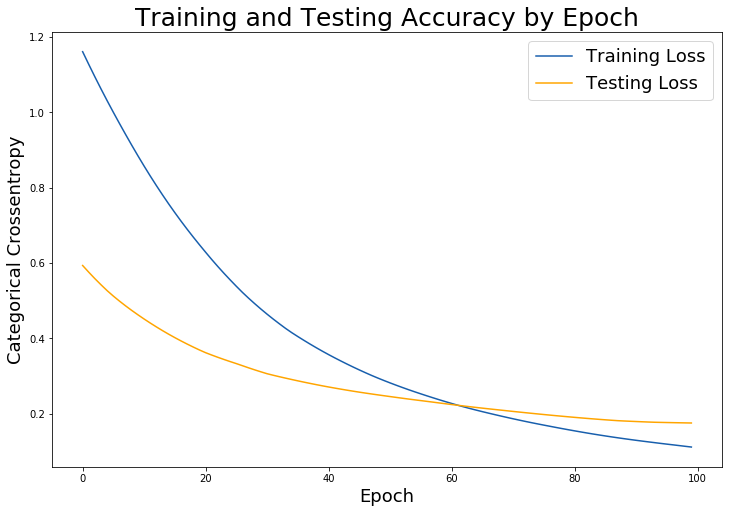

In [386]:
# Check out our train loss and test loss over epochs.
train_loss = model.history.history['loss']
test_loss = model.history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)

plt.legend(fontsize = 18);